<a href="https://colab.research.google.com/github/sonnylewis1/clustering/blob/main/text_clustering(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***IMPORTING OF THE NECESSARY LIBRARIES***

In [ ]:
import nltk
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from gensim.models import LdaModel
from gensim.corpora import Dictionary
import gensim
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.decomposition import PCA
from sklearn.metrics import cohen_kappa_score
from gensim.models.coherencemodel import CoherenceModel
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn import mixture
from gensim.models import LdaMulticore
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from collections import Counter

***DOWNLOADING RELEVANT RESOURCES FROM NLTK***

In [ ]:
nltk.download('gutenberg')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

***CHECKING THE CONTENT OF GUTENBERG*** 

In [ ]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

***ASSIGNING THE SELECTED TEXTS TO VARIABLES***

In [ ]:
text1 =  nltk.corpus.gutenberg.raw('austen-emma.txt')
text2 = nltk.corpus.gutenberg.raw('bible-kjv.txt')
text3 = nltk.corpus.gutenberg.raw('whitman-leaves.txt')
text4 = nltk.corpus.gutenberg.raw('milton-paradise.txt')
text5 = nltk.corpus.gutenberg.raw('melville-moby_dick.txt')
text6 = nltk.corpus.gutenberg.raw('edgeworth-parents.txt')
text7 = nltk.corpus.gutenberg.raw('chesterton-thursday.txt')

In [ ]:
print(text1)

***VIEWING THE NUMBER OF WORDS IN EACH TEXT***

In [ ]:
number_words_texts=[(len(nltk.word_tokenize(text1)),'austen-emma'),(len(nltk.word_tokenize(text2)),'bible-kjv'), (len(nltk.word_tokenize(text3)),'whitman-leaves'), 
                    (len(nltk.word_tokenize(text4)),'milton-paradise'), (len(nltk.word_tokenize(text5)),'melville-moby_dick'), 
                    (len(nltk.word_tokenize(text6)),'edgeworth-parents'), (len(nltk.word_tokenize(text7)),'chesterton-thursday')]
print(number_words_texts)

[(191673, 'austen-emma'), (946812, 'bible-kjv'), (149198, 'whitman-leaves'), (95709, 'milton-paradise'), (254989, 'melville-moby_dick'), (209090, 'edgeworth-parents'), (69408, 'chesterton-thursday')]


In [ ]:
n_o_w = pd.DataFrame(number_words_texts)
n_o_w = n_o_w.rename(columns={0: "Number of words", 1: "Text"})
print(n_o_w)

   Number of words                 Text
0           191673          austen-emma
1           946812            bible-kjv
2           149198       whitman-leaves
3            95709      milton-paradise
4           254989   melville-moby_dick
5           209090    edgeworth-parents
6            69408  chesterton-thursday


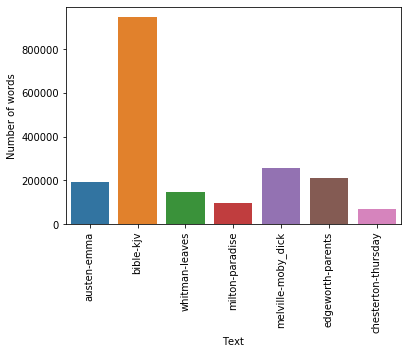

In [ ]:
sns.barplot(n_o_w['Text'],n_o_w['Number of words'],label="Number of Words")
plt.xticks(rotation=90)
plt.show()

***TOKENIZING THE SELECTED TEXTS INTO SENTENCES***

In [ ]:
sent1 = nltk.sent_tokenize(text1)
sent2 = nltk.sent_tokenize(text2)
sent3 = nltk.sent_tokenize(text3)
sent4 = nltk.sent_tokenize(text4)
sent5 = nltk.sent_tokenize(text5)
sent6 = nltk.sent_tokenize(text6)
sent7 = nltk.sent_tokenize(text7)

In [ ]:
print(sent3)

## ***PREPROCESSING OF THE DATA***

***DEFINING A FUNCTION (word_list) TO REMOVE STOPWORDS, NUMBERS, PUNCTUATIONS AS WELL AS LEMMATIZE***

In [ ]:
wordlemmatize = WordNetLemmatizer()

def word_list(sent):
    sentn = ''
    sentn = sentn.join(sent)
    sentn=sentn.replace('.',' ').replace(',',' ').replace('!',' ').replace('?',' ').replace('--',' ').replace('-',' ').replace(';',' ').replace("'",' ').replace('"',' ').replace("_",' ').replace(':',' ').replace('(',' ').replace(')',' ').replace('0',' ').replace('1',' ').replace('2',' ').replace('3',' ').replace('4',' ').replace('5',' ').replace('6',' ').replace('7',' ').replace('8',' ').replace('9',' ')#REPLACING OF UNWANTED CHARACTERS
    words = nltk.word_tokenize(sentn) #TOKENIZING THE SENTENCES INTO WORDS
    stop_words = set(stopwords.words('english'))

    wordlen = []
    words = [w.lower() for w in words if not w in stop_words] #REMOVAL OF STOPWORDS FROM THE TEXT 
    for word in words:
      wordsv = wordlemmatize.lemmatize(word, pos='v') #LEMMATIZING OF THE TEXT BASED ON VERBS
      wordsa = wordlemmatize.lemmatize(wordsv, pos='a') #LEMMATIZING OF THE TEXT BASED ON ADJECTIVES
      words = wordlemmatize.lemmatize(wordsa, pos='n') #LEMMATIZING OF THE TEXT BASED ON NOUNS
      wordlen.append(words) #APPENDING THE WORDS AFTER THE REMOVAL OF STOPWORDS, UNWANTED PUNTUATIONS, SYMBOLS, NUMBERS AND LEMMANTIZING 
    return wordlen


***APPLYING THE FUNCTION (word_list) TO THE TOKENIZED SENTENCES***


In [ ]:
words1 = word_list(sent1)
words2 = word_list(sent2)
words3 = word_list(sent3)
words4 = word_list(sent4)
words5 = word_list(sent5)
words6 = word_list(sent6)
words7 = word_list(sent7)

In [ ]:
word_count = Counter(words1)
print(word_count.most_common(10))

[('i', 3179), ('mr', 1851), ('say', 878), ('emma', 865), ('could', 837), ('would', 821), ('think', 693), ('miss', 612), ('must', 571), ('she', 570)]


In [ ]:
word_count = Counter(words2)
print(word_count.most_common(10))

[('and', 12849), ('shall', 9838), ('unto', 8997), ('i', 8854), ('lord', 8006), ('say', 6531), ('thou', 5474), ('god', 4716), ('thy', 4600), ('come', 4165)]


In [ ]:
word_count = Counter(words3)
print(word_count.most_common(10))

[('i', 2932), ('the', 1299), ('o', 599), ('and', 537), ('see', 468), ('}', 389), ('one', 379), ('a', 361), ('love', 349), ('day', 334)]


In [ ]:
word_count = Counter(words4)
print(word_count.most_common(10))

[('and', 596), ('i', 589), ('of', 564), ('to', 470), ('the', 463), ('heaven', 436), ('thou', 432), ('thy', 414), ('thee', 358), ('thus', 318)]


In [ ]:
word_count = Counter(words5)
print(word_count.most_common(10))

[('i', 2122), ('whale', 1626), ('one', 940), ('but', 705), ('the', 704), ('like', 652), ('say', 634), ('ship', 623), ('upon', 566), ('man', 543)]


In [ ]:
word_count = Counter(words6)
print(word_count.most_common(10))

[('i', 3673), ('say', 1791), ('mr', 765), ('go', 678), ('come', 636), ('good', 609), ('know', 602), ('the', 578), ('one', 515), ('would', 511)]


In [ ]:
word_count = Counter(words7)
print(word_count.most_common(10))

[('i', 885), ('say', 602), ('syme', 519), ('the', 345), ('man', 276), ('like', 268), ('he', 268), ('one', 203), ('go', 185), ('come', 163)]


***CHECKING FOR THE LENGHT OF THE TEXTS AFTER THE FIRST FUNTION WAS APPLIED***

In [ ]:
number_words_texts=[(len(words1),'austen-emma'),(len(words2),'bible-kjv'),(len(words3),'whitman-leaves'), (len(words4), 'milton-paradise'),
                    (len(words5),'melville-moby_dick'), (len(words6), 'edgeworth-parents'), (len(words7),'chesterton-thursday')]
n_o_w = pd.DataFrame(number_words_texts)
n_o_w = n_o_w.rename(columns={0: "Number of words", 1: "Text"})
print(n_o_w)

   Number of words                 Text
0            81493          austen-emma
1           413693            bible-kjv
2            75686       whitman-leaves
3            52974      milton-paradise
4           118804   melville-moby_dick
5            87234    edgeworth-parents
6            31614  chesterton-thursday


***VISUALIZATION OF THE LENGHT OF THE TEXTS***

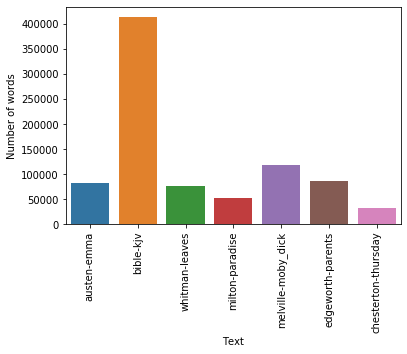

In [ ]:
sns.barplot(n_o_w['Text'],n_o_w['Number of words'],label="Number of Words")
plt.xticks(rotation=90)
plt.show()

***DEFINING ANOTHER FUNTION (random_sample) TO ASSIGN 150 WORDS TO A DOCUMENT AND PICK 200 RANDOM DOCUMENTS FROM EACH TEXT***

In [ ]:
def random_sample(list_words):
  count = 0
  str = ''
  for word in list_words:
    if count<150:
      str = str + word
      str = str+' '
      count = count + 1
    else:
      str = str+'###'
      count = 0
  strr = str.split('###')
  return random.sample(strr,200)
  

***APPLYING OF THE SECOND FUNCTION (random_sample) TO THE PROCESSED TEXTS***

In [ ]:
r_str1 = random_sample(words1)
r_str2 = random_sample(words2)
r_str3 = random_sample(words3)
r_str4 = random_sample(words4)
r_str5 = random_sample(words5)
r_str6 = random_sample(words6)
r_str7 = random_sample(words7)

In [ ]:
print(r_str1[4])

***ASSIGNING THE NAME OF THE AUTHOR OF EACH DOCUMENT TO THE RESPECTIVE DOCUMENT***

In [ ]:
labeled_names = ([(sent, 'austen') for sent in r_str1] + [(sent, 'bible') for sent in r_str2]+[(sent, 'whitman') for sent in r_str3]+
                 [(sent, 'milton') for sent in r_str4]+[(sent, 'melville') for sent in r_str5]+[(sent, 'edgeworth') for sent in r_str6]+
								         [(sent, 'chesterton') for sent in r_str7])
pd.DataFrame(labeled_names)

,0,1
0,tell father young man quite thing he open door...,austen
1,brunswick square i say i forswear ever draw bo...,austen
2,bat mr perry mr goddard others good deal behin...,austen
3,express surprize he come speak father subject ...,austen
4,certainly warm yet think mr weston would strik...,austen
...,...,...
1395,wonder comet earthquake night appear garden th...,chesterton
1396,know fact member supreme anarchist council dis...,chesterton
1397,man could walk like snail syme walk like wind ...,chesterton
1398,get smite oppressor so right and may i ask con...,chesterton


***SHUFFLING THE LABELED NAMES AND VIEWING THEM IN A DATAFRAME USING PANDAS***

In [ ]:
random.shuffle(labeled_names)
labeled = pd.DataFrame(labeled_names)

***LABELING OF THE COLUMNS OF THE DATAFRAME***

In [ ]:
labeled = labeled.rename(columns={0: "Text", 1: "Author"})
labeled.head()

,Text,Author
0,jane fairfax history she fall good hand know n...,austen
1,i give father shall posse and word lord spake ...,bible
2,knee ye i trust to know ye right ye know nativ...,milton
3,light furious face could see farthest figure s...,chesterton
4,detestable joint stock company nation knave fo...,melville


***SPLITTING OF THE DATASET***

In [ ]:
X = labeled['Text'].values
y = labeled['Author'].values

In [ ]:
pd.DataFrame(X).head()

,0
0,jane fairfax history she fall good hand know n...
1,i give father shall posse and word lord spake ...
2,knee ye i trust to know ye right ye know nativ...
3,light furious face could see farthest figure s...
4,detestable joint stock company nation knave fo...


***TRANSFORMING OF THE AUTHOR COLUMN*** 

In [ ]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [ ]:
pd.DataFrame(y).head()

,0
0,0
1,1
2,5
3,2
4,4


## **FEATURE ENGINEERING**
***TRANSFORMATION OF THE TEXT USING BAG OF WORDS***

In [ ]:
count = CountVectorizer(min_df=3, analyzer='word', ngram_range=(1,2)) #CONSIDERING BOTH BIGRAMS AND UNIGRAMS, IGNORING WORDS THAT HAVE A DOCUMENT FREQUENCY OF LESS THAN 3.
bow = count.fit_transform(X)
array_bow = bow.toarray()

In [ ]:
Bow_feature_names = count.get_feature_names()

In [ ]:
X_Bow = pd.DataFrame(bow.toarray(), columns=Bow_feature_names) #VIEWING IN FORM OF A DATAFRAME
X_Bow

,aaron,aaron son,abandon,abase,abbey,abbey mill,abdiel,abhor,abide,abideth,ability,abject,able,able go,able keep,able make,able speak,able walk,aboard,abolish,abominable,abomination,abound,about,above,abraham,abraham seed,abroad,abroad upon,abrupt,abruptly,absalom,absence,absent,absolute,absolutely,absorb,abstain,abstract,abstraction,...,you mr,you must,you need,you oblige,you quite,you right,you say,you see,you seem,you shall,you speak,you tell,you think,you understand,you want,you would,young,young bullock,young fellow,young gentleman,young lady,young lion,young man,young men,young old,young people,young son,young woman,your,youth,youth even,youthful,zadok,zeal,zechariah,zedekiah,zidon,zion,zion shall,zone
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1396,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1398,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


***TRANSFORMATION OF THE TEXT USING TF-IDF***

In [ ]:
tf = TfidfVectorizer(analyzer='word',min_df= 3, ngram_range=(1, 2))
Tfid = tf.fit_transform(X)
array_tfid = Tfid.toarray()

In [ ]:
tfid_feature_names = tf.get_feature_names()
X_Tfid = pd.DataFrame(Tfid.toarray(), columns=tfid_feature_names)
X_Tfid

,aaron,aaron son,abandon,abase,abbey,abbey mill,abdiel,abhor,abide,abideth,ability,abject,able,able go,able keep,able make,able speak,able walk,aboard,abolish,abominable,abomination,abound,about,above,abraham,abraham seed,abroad,abroad upon,abrupt,abruptly,absalom,absence,absent,absolute,absolutely,absorb,abstain,abstract,abstraction,...,you mr,you must,you need,you oblige,you quite,you right,you say,you see,you seem,you shall,you speak,you tell,you think,you understand,you want,you would,young,young bullock,young fellow,young gentleman,young lady,young lion,young man,young men,young old,young people,young son,young woman,your,youth,youth even,youthful,zadok,zeal,zechariah,zedekiah,zidon,zion,zion shall,zone
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.100125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.092867,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.083967,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.107064,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.196657,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.104995,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.090968,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1396,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070714,0.0,0.0,0.0,0.121782,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1397,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

## ***LDA***

***FINDING THE BEST NUMBER OF TOPICS TO BE USED***

In [ ]:
Dict = labeled['Text'].map(word_list)

In [ ]:
#CREATING A DICTIONARY AND A CORPUS

dictionary = gensim.corpora.Dictionary(Dict)
corpus = [dictionary.doc2bow(doc)for doc in Dict]

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model,model_list, coherence_values

In [ ]:
model,model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=Dict, start=2, limit=40, step=6)

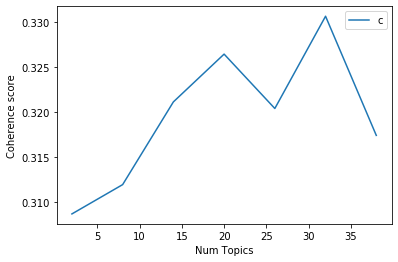

In [ ]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

***TRANSFORMATION OF THE TEXT USING LDA FROM BOW***

In [ ]:
lda = LDA(n_components=25, n_jobs=-1)
array_lda_Bow = lda.fit_transform(X_Bow)

X_lda_Bow = pd.DataFrame(array_lda_Bow)
X_lda_Bow

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.507787,0.486499,0.000248,0.000248,0.000248,0.000248
1,0.000217,0.000217,0.000217,0.732880,0.000217,0.000217,0.000217,0.000217,0.000217,0.000217,0.262120,0.000217,0.000217,0.000217,0.000217,0.000217,0.000217,0.000217,0.000217,0.000217,0.000217,0.000217,0.000217,0.000217,0.000217
2,0.000258,0.000258,0.000258,0.032878,0.000258,0.000258,0.000258,0.000258,0.000258,0.000258,0.000258,0.000258,0.000258,0.000258,0.000258,0.346702,0.089121,0.000258,0.000258,0.000258,0.525880,0.000258,0.000258,0.000258,0.000258
3,0.000242,0.000242,0.000242,0.000242,0.000242,0.000242,0.000242,0.000242,0.000242,0.000242,0.000242,0.000242,0.000242,0.000242,0.000242,0.000242,0.000242,0.000242,0.000242,0.000242,0.169241,0.000242,0.000242,0.825183,0.000242
4,0.000274,0.000274,0.000274,0.000274,0.000274,0.000274,0.000274,0.000274,0.000274,0.000274,0.000274,0.000274,0.671749,0.000274,0.000274,0.321950,0.000274,0.000274,0.000274,0.000274,0.000274,0.000274,0.000274,0.000274,0.000274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.000260,0.030800,0.000260,0.000260,0.430847,0.000260,0.000260,0.000260,0.000260,0.000260,0.089070,0.000260,0.000260,0.000260,0.000260,0.000260,0.000260,0.000260,0.000260,0.281533,0.162555,0.000260,0.000260,0.000260,0.000260
1396,0.000244,0.000244,0.000244,0.000244,0.179195,0.000244,0.000244,0.000244,0.000244,0.000244,0.000244,0.000244,0.000244,0.000244,0.000244,0.000244,0.206680,0.000244,0.000244,0.212147,0.000244,0.000244,0.396856,0.000244,0.000244
1397,0.177338,0.000272,0.000272,0.000272,0.000272,0.000272,0.000272,0.000272,0.142424,0.000272,0.000272,0.000272,0.000272,0.000272,0.000272,0.276593,0.000272,0.000272,0.000272,0.000272,0.194162,0.204040,0.000272,0.000272,0.000272
1398,0.000235,0.000235,0.000235,0.000235,0.000235,0.000235,0.000235,0.000235,0.000235,0.099110,0.000235,0.000235,0.000235,0.000235,0.000235,0.000235,0.000235,0.218734,0.000235,0.000235,0.000235,0.000235,0.000235,0.676979,0.000235


***TRANSFORMATION OF THE TEXT USING LDA FROM TFID***

In [ ]:
lda = LDA(n_components=25, n_jobs=-1)
array_lda_Tfid = lda.fit_transform(X_Tfid)

X_lda_Tfid = pd.DataFrame(array_lda_Tfid)
X_lda_Tfid

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0.003395,0.003395,0.003395,0.003395,0.003395,0.830985,0.003395,0.003395,0.003395,0.003395,0.003395,0.003395,0.003395,0.090940,0.003395,0.003395,0.003395,0.003395,0.003395,0.003395,0.003395,0.003395,0.003395,0.003395,0.003395
1,0.003834,0.003834,0.003834,0.003834,0.003834,0.483130,0.003834,0.003834,0.003834,0.003834,0.003834,0.003834,0.003834,0.197539,0.003834,0.003834,0.003834,0.003834,0.003834,0.234977,0.003834,0.003834,0.003834,0.003834,0.003834
2,0.003539,0.003539,0.003539,0.003539,0.003539,0.274911,0.003539,0.003539,0.003539,0.003539,0.003539,0.003539,0.003539,0.460152,0.003539,0.003539,0.003539,0.003539,0.003539,0.003539,0.187074,0.003539,0.003539,0.003539,0.003539
3,0.003393,0.003393,0.234766,0.003393,0.003393,0.273618,0.003393,0.003393,0.003393,0.003393,0.003393,0.003393,0.003393,0.416979,0.003393,0.003393,0.003393,0.003393,0.003393,0.003393,0.003393,0.003393,0.003393,0.003393,0.003393
4,0.003595,0.003595,0.003595,0.245497,0.003595,0.286393,0.003595,0.003595,0.003595,0.003595,0.003595,0.003595,0.003595,0.305309,0.003595,0.003595,0.003595,0.003595,0.003595,0.003595,0.087310,0.003595,0.003595,0.003595,0.003595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.003498,0.003498,0.003498,0.003498,0.045532,0.753182,0.003498,0.003498,0.039748,0.003498,0.003498,0.003498,0.003498,0.079633,0.003498,0.003498,0.011954,0.003498,0.003498,0.003498,0.003498,0.003498,0.003498,0.003498,0.003498
1396,0.004307,0.004307,0.004307,0.004307,0.004307,0.350614,0.004307,0.004307,0.004307,0.004307,0.004307,0.004307,0.004307,0.096297,0.004307,0.004307,0.004307,0.004307,0.004307,0.212781,0.004307,0.004307,0.004307,0.004307,0.249860
1397,0.197157,0.003598,0.003598,0.003598,0.003598,0.321382,0.003598,0.003598,0.003598,0.003598,0.003598,0.003598,0.003598,0.402307,0.003598,0.003598,0.003598,0.003598,0.003598,0.003598,0.003598,0.003598,0.003598,0.003598,0.003598
1398,0.004023,0.004023,0.004023,0.004023,0.004023,0.370130,0.004023,0.004023,0.004023,0.004023,0.004023,0.004023,0.004023,0.254356,0.004023,0.004023,0.004023,0.004023,0.004023,0.004023,0.004023,0.004023,0.004023,0.004023,0.287005


***CONCATENATION OF MODELS***

In [ ]:
concat_lda = np.concatenate((array_tfid,array_lda_Tfid), axis = 1)

In [ ]:
pd.DataFrame(concat_lda)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,12357,12358,12359,12360,12361,12362,12363,12364,12365,12366,12367,12368,12369,12370,12371,12372,12373,12374,12375,12376,12377,12378,12379,12380,12381,12382,12383,12384,12385,12386,12387,12388,12389,12390,12391,12392,12393,12394,12395,12396
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.100125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.083967,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003395,0.003395,0.003395,0.003395,0.003395,0.830985,0.003395,0.003395,0.003395,0.003395,0.003395,0.003395,0.003395,0.090940,0.003395,0.003395,0.003395,0.003395,0.003395,0.003395,0.003395,0.003395,0.003395,0.003395,0.003395
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003834,0.003834,0.003834,0.003834,0.003834,0.483130,0.003834,0.003834,0.003834,0.003834,0.003834,0.003834,0.003834,0.197539,0.003834,0.003834,0.003834,0.003834,0.003834,0.234977,0.003834,0.003834,0.003834,0.003834,0.003834
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.107064,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.196657,0.0,0.0,0.0,0.0,0.0,0.0,0.003539,0.003539,0.003539,0.003539,0.003539,0.274911,0.003539,0.003539,0.003539,0.003539,0.003539,0.003539,0.003539,0.460152,0.003539,0.003539,0.003539,0.003539,0.003539,0.003539,0.187074,0.003539,0.003539,0.003539,0.003539
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003393,0.003393,0.234766,0.003393,0.003393,0.273618,0.003393,0.003393,0.003393,0.003393,0.003393,0.003393,0.003393,0.416979,0.003393,0.003393,0.003393,0.003393,0.003393,0.003393,0.003393,0.003393,0.003393,0.003393,0.003393
4,0.0,0.0,0.0,0.104995,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.090968,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003595,0.003595,0.003595,0.245497,0.003595,0.286393,0.003595,0.003595,0.003595,0.003595,0.003595,0.003595,0.003595,0.305309,0.003595,0.003595,0.003595,0.003595,0.003595,0.003595,0.087310,0.003595,0.003595,0.003595,0.003595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003498,0.003498,0.003498,0.003498,0.045532,0.753182,0.003498,0.003498,0.039748,0.003498,0.003498,0.003498,0.003498,0.079633,0.003498,0.003498,0.011954,0.003498,0.003498,0.003498,0.003498,0.003498,0.003498,0.003498,0.003498
1396,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.004307,0.004307,0.004307,0.004307,0.004307,0.350614,0.004307,0

In [ ]:
concat_lda = pd.concat([X_Tfid, X_lda_Tfid], axis=1, sort=False)

In [ ]:
concat_lda

,aaron,aaron son,abandon,abase,abbey,abbey mill,abdiel,abhor,abide,abideth,ability,abject,able,able go,able keep,able make,able speak,able walk,aboard,abolish,abominable,abomination,abound,about,above,abraham,abraham seed,abroad,abroad upon,abrupt,abruptly,absalom,absence,absent,absolute,absolutely,absorb,abstain,abstract,abstraction,...,young people,young son,young woman,your,youth,youth even,youthful,zadok,zeal,zechariah,zedekiah,zidon,zion,zion shall,zone,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.100125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.083967,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003395,0.003395,0.003395,0.003395,0.003395,0.830985,0.003395,0.003395,0.003395,0.003395,0.003395,0.003395,0.003395,0.090940,0.003395,0.003395,0.003395,0.003395,0.003395,0.003395,0.003395,0.003395,0.003395,0.003395,0.003395
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003834,0.003834,0.003834,0.003834,0.003834,0.483130,0.003834,0.003834,0.003834,0.003834,0.003834,0.003834,0.003834,0.197539,0.003834,0.003834,0.003834,0.003834,0.003834,0.234977,0.003834,0.003834,0.003834,0.003834,0.003834
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.107064,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.196657,0.0,0.0,0.0,0.0,0.0,0.0,0.003539,0.003539,0.003539,0.003539,0.003539,0.274911,0.003539,0.003539,0.003539,0.003539,0.003539,0.003539,0.003539,0.460152,0.003539,0.003539,0.003539,0.003539,0.003539,0.003539,0.187074,0.003539,0.003539,0.003539,0.003539
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003393,0.003393,0.234766,0.003393,0.003393,0.273618,0.003393,0.003393,0.003393,0.003393,0.003393,0.003393,0.003393,0.416979,0.003393,0.003393,0.003393,0.003393,0.003393,0.003393,0.003393,0.003393,0.003393,0.003393,0.003393
4,0.0,0.0,0.0,0.104995,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.090968,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003595,0.003595,0.003595,0.245497,0.003595,0.286393,0.003595,0.003595,0.003595,0.003595,0.003595,0.003595,0.003595,0.305309,0.003595,0.003595,0.003595,0.003595,0.003595,0.003595,0.087310,0.003595,0.003595,0.003595,0.003595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003498,0.003498,0.003498,0.003498,0.045532,0.753182,0.003498,0.003498,0.039748,0.003498,0.003498,0.003498,0.003498,0.079633,0.003498,0.003498,0.011954,0.003498,0.003498,0.003498,0.003498,0.003498,0.003498,0.003498,0.003498
1396,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0

In [ ]:
concat_bow = np.concatenate((array_bow,array_lda_Bow), axis = 1)

In [ ]:
pd.DataFrame(concat_bow)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,12357,12358,12359,12360,12361,12362,12363,12364,12365,12366,12367,12368,12369,12370,12371,12372,12373,12374,12375,12376,12377,12378,12379,12380,12381,12382,12383,12384,12385,12386,12387,12388,12389,12390,12391,12392,12393,12394,12395,12396
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.507787,0.486499,0.000248,0.000248,0.000248,0.000248
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000217,0.000217,0.000217,0.732880,0.000217,0.000217,0.000217,0.000217,0.000217,0.000217,0.262120,0.000217,0.000217,0.000217,0.000217,0.000217,0.000217,0.000217,0.000217,0.000217,0.000217,0.000217,0.000217,0.000217,0.000217
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000258,0.000258,0.000258,0.032878,0.000258,0.000258,0.000258,0.000258,0.000258,0.000258,0.000258,0.000258,0.000258,0.000258,0.000258,0.346702,0.089121,0.000258,0.000258,0.000258,0.525880,0.000258,0.000258,0.000258,0.000258
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000242,0.000242,0.000242,0.000242,0.000242,0.000242,0.000242,0.000242,0.000242,0.000242,0.000242,0.000242,0.000242,0.000242,0.000242,0.000242,0.000242,0.000242,0.000242,0.000242,0.169241,0.000242,0.000242,0.825183,0.000242
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000274,0.000274,0.000274,0.000274,0.000274,0.000274,0.000274,0.000274,0.000274,0.000274,0.000274,0.000274,0.671749,0.000274,0.000274,0.321950,0.000274,0.000274,0.000274,0.000274,0.000274,0.000274,0.000274,0.000274,0.000274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000260,0.030800,0.000260,0.000260,0.430847,0.000260,0.000260,0.000260,0.000260,0.000260,0.089070,0.000260,0.000260,0.000260,0.000260,0.000260,0.000260,0.000260,0.000260,0.281533,0.162555,0.000260,0.000260,0.000260,0.000260
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000244,0.000244,0.000244,0.000244,0.179195,0.000244,0.000244,0.000244,0.000244,0.000244,0.000244,0.000244,0.000244,0.000244,0.000244,0.000244,0.206680,0.000244,0.000244,0.212147,0.000244,0.000244,0.396856,0.000244,0.000244
1397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

## ***MODELLING***

***K MEANS***

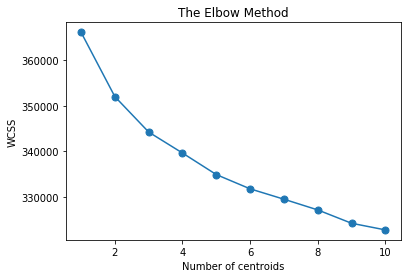

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_Bow)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o', markersize = 7)
plt.title('The Elbow Method')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.show()


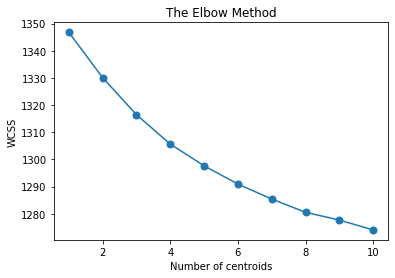

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_Tfid)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o', markersize = 7)
plt.title('The Elbow Method')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.show()


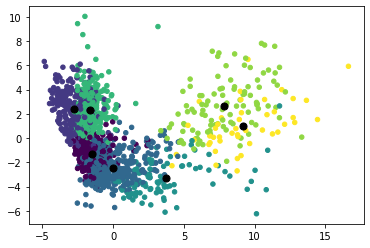

In [ ]:
kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=10, random_state=0)
pca = PCA(n_components=2, random_state=0)

pred_bow = kmeans.fit_predict(array_bow)

reduced_features = pca.fit_transform(array_bow)
reduced_cluster = pca.transform(kmeans.cluster_centers_)

plt.scatter(reduced_features[:,0], reduced_features[:, 1], s = 20, c = pred_bow)
plt.scatter(reduced_cluster[:, 0], reduced_cluster[:, 1], s = 50, c = 'black', label = 'Centroids')

In [ ]:
doc_per_cluster = pd.DataFrame(pred_bow)
doc_per_cluster = doc_per_cluster.rename(columns={0: "Label"})
doc_per_cluster['Label'].value_counts()

2    363
4    288
0    275
1    237
5    104
3     89
6     44
Name: Label, dtype: int64

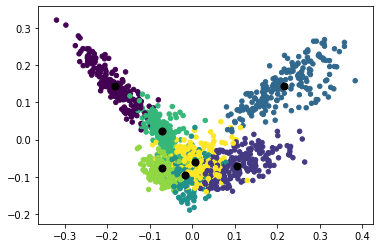

In [ ]:
pred_tfid = kmeans.fit_predict(array_tfid)

reduced_features = pca.fit_transform(array_tfid)
reduced_cluster = pca.transform(kmeans.cluster_centers_)

plt.scatter(reduced_features[:,0], reduced_features[:, 1], s = 20, c = pred_tfid)
plt.scatter(reduced_cluster[:, 0], reduced_cluster[:, 1], s = 50, c = 'black', label = 'Centroids')

In [ ]:
doc_per_cluster = pd.DataFrame(pred_tfid)
doc_per_cluster = doc_per_cluster.rename(columns={0: "Label"})
doc_per_cluster['Label'].value_counts()

6    248
1    224
0    199
4    194
5    192
2    189
3    154
Name: Label, dtype: int64

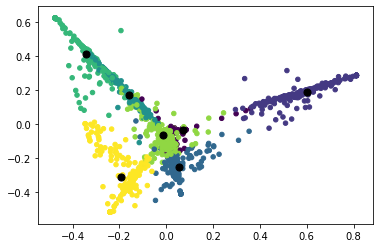

In [ ]:
pred_ldabow = kmeans.fit_predict(array_lda_Bow)

reduced_featureslda = pca.fit_transform(array_lda_Bow)
reduced_cluster = pca.transform(kmeans.cluster_centers_)

plt.scatter(reduced_featureslda[:,0], reduced_featureslda[:, 1], s = 20, c = pred_ldabow)
plt.scatter(reduced_cluster[:, 0], reduced_cluster[:, 1], s = 50, c = 'black', label = 'Centroids')

In [ ]:
doc_per_cluster = pd.DataFrame(pred_ldabow)
doc_per_cluster = doc_per_cluster.rename(columns={0: "Label"})
doc_per_cluster['Label'].value_counts()

5    397
2    207
3    197
6    194
1    192
4    163
0     50
Name: Label, dtype: int64

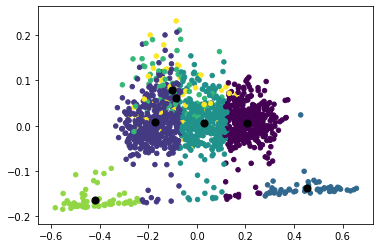

In [ ]:
pred_ldatfid = kmeans.fit_predict(array_lda_Tfid)

reduced_featureslda = pca.fit_transform(array_lda_Tfid)
reduced_cluster = pca.transform(kmeans.cluster_centers_)

plt.scatter(reduced_featureslda[:,0], reduced_featureslda[:, 1], s = 20, c = pred_ldatfid)
plt.scatter(reduced_cluster[:, 0], reduced_cluster[:, 1], s = 50, c = 'black', label = 'Centroids')

In [ ]:
doc_per_cluster = pd.DataFrame(pred_ldatfid)
doc_per_cluster = doc_per_cluster.rename(columns={0: "Label"})
doc_per_cluster['Label'].value_counts()

1    439
0    373
3    347
4     70
6     59
5     59
2     53
Name: Label, dtype: int64

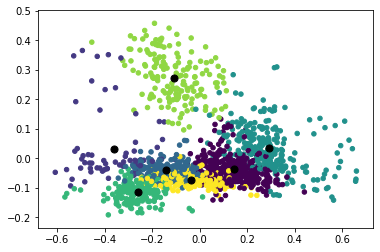

In [ ]:
pred_ldaconcat = kmeans.fit_predict(concat_lda)

reduced_featuresconcat_lda = pca.fit_transform(concat_lda)
reduced_cluster = pca.transform(kmeans.cluster_centers_)

plt.scatter(reduced_featuresconcat_lda[:,0], reduced_featuresconcat_lda[:, 1], s = 20, c = pred_ldaconcat)
plt.scatter(reduced_cluster[:, 0], reduced_cluster[:, 1], s = 50, c = 'black', label = 'Centroids')

In [ ]:
doc_per_cluster = pd.DataFrame(pred_ldaconcat)
doc_per_cluster = doc_per_cluster.rename(columns={0: "Label"})
doc_per_cluster['Label'].value_counts()

0    349
3    254
2    203
4    185
6    174
5    167
1     68
Name: Label, dtype: int64

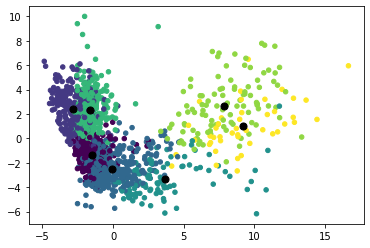

In [ ]:
pred_bowconcat = kmeans.fit_predict(concat_bow)

reduced_featuresconcat_bow = pca.fit_transform(concat_bow)
reduced_cluster = pca.transform(kmeans.cluster_centers_)

plt.scatter(reduced_featuresconcat_bow[:,0], reduced_featuresconcat_bow[:, 1], s = 20, c = pred_bowconcat)
plt.scatter(reduced_cluster[:, 0], reduced_cluster[:, 1], s = 50, c = 'black', label = 'Centroids')

In [ ]:
doc_per_cluster = pd.DataFrame(pred_bowconcat)
doc_per_cluster = doc_per_cluster.rename(columns={0: "Label"})
doc_per_cluster['Label'].value_counts()

2    359
4    289
0    275
1    237
5    104
3     92
6     44
Name: Label, dtype: int64

***AGGLOMERATIVE CLUSTERING***

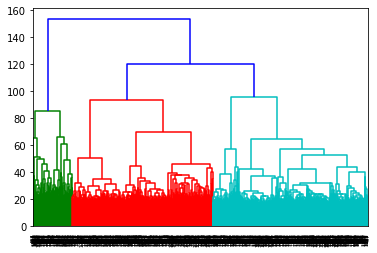

In [ ]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(array_bow, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=7, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
agg_bow = hc.fit_predict(array_bow)
labels1 = hc.labels_

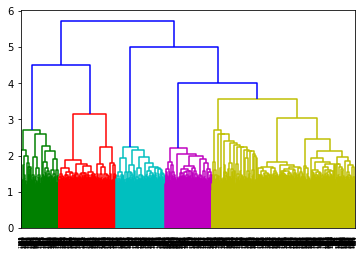

In [ ]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(array_tfid, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=7, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
agg_tfid = hc.fit_predict(array_tfid)
labels2 = hc.labels_

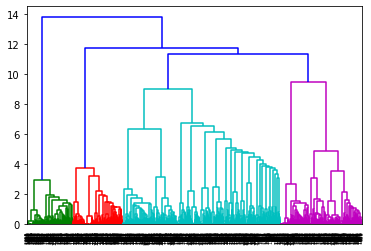

In [ ]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(array_lda_Bow, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=7, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
agg_lda_bow = hc.fit_predict(array_lda_Bow)
labels3 = hc.labels_

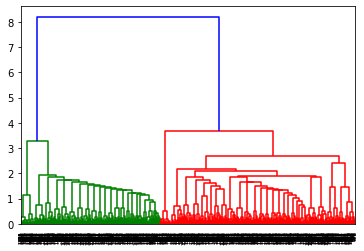

In [ ]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(array_lda_Tfid, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=7, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
agg_lda_tfid = hc.fit_predict(array_lda_Tfid)
labels4 = hc.labels_

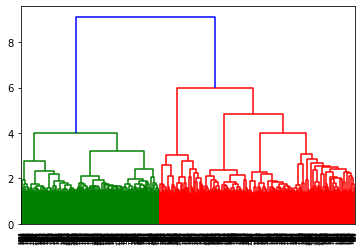

In [ ]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(concat_lda, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=7, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
agg_lda_concat = hc.fit_predict(concat_lda)

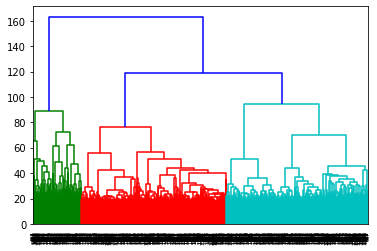

In [ ]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(concat_bow, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=7, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
agg_bow_concat = hc.fit_predict(concat_bow)

In [ ]:
# using Gaussian mixture model(GMM) as a ANN model for clusterring
gmm = mixture.GaussianMixture(n_components=7,covariance_type='full')
gmm.fit(array_bow)
pred_bow_gmm = gmm.fit_predict(array_bow)


In [ ]:
pca3 = PCA(n_components=2, random_state=0)
reduced_features3 = pca3.fit_transform(array_bow)
plt.scatter(reduced_features3[:,0], reduced_features3[:,1], c = pred_bow)

In [ ]:
#using LDA as a Topic Model
for idx, topic in model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.012*"say" + 0.010*"mr" + 0.009*"shall" + 0.007*"lord" + 0.006*"day" + 0.006*"could" + 0.005*"see" + 0.005*"go" + 0.005*"come" + 0.005*"miss"
Topic: 1 
Words: 0.010*"say" + 0.008*"know" + 0.006*"think" + 0.005*"would" + 0.005*"thou" + 0.005*"day" + 0.005*"good" + 0.004*"never" + 0.004*"shall" + 0.004*"much"
Topic: 2 
Words: 0.014*"say" + 0.009*"one" + 0.007*"thy" + 0.007*"would" + 0.007*"thing" + 0.007*"mr" + 0.006*"could" + 0.005*"syme" + 0.005*"come" + 0.005*"like"
Topic: 3 
Words: 0.016*"say" + 0.009*"one" + 0.007*"man" + 0.007*"go" + 0.006*"like" + 0.005*"think" + 0.005*"could" + 0.005*"would" + 0.005*"look" + 0.005*"see"
Topic: 4 
Words: 0.008*"face" + 0.007*"thee" + 0.005*"one" + 0.005*"think" + 0.005*"thy" + 0.005*"day" + 0.005*"thou" + 0.005*"see" + 0.004*"say" + 0.004*"yet"
Topic: 5 
Words: 0.010*"thou" + 0.009*"come" + 0.008*"man" + 0.007*"ye" + 0.007*"say" + 0.007*"shall" + 0.007*"god" + 0.006*"see" + 0.005*"day" + 0.005*"know"
Topic: 6 
Words: 0.014*"say" 

# ***MODEL EVALUATION***

***SILHOUETTE***

In [ ]:
silhouette_score(array_bow,pred_bow)

0.012455150381858208

In [ ]:
silhouette_score(concat_lda,pred_ldaconcat)

0.014863495354804818

In [ ]:
silhouette_score(array_tfid,pred_tfid)

0.015159293363858148

In [ ]:
silhouette_score(array_lda_Bow,pred_ldabow)

0.2207648318565684

In [ ]:
silhouette_score(array_lda_Tfid,pred_ldatfid)

0.1595098272561577

In [ ]:
silhouette_score(concat_bow,pred_bowconcat) #using kmeans (bow)

0.022597839203902476

In [ ]:
silhouette_score(array_bow,pred_bow_gmm) #using gmm(bow)

In [ ]:
silhouette_score(array_bow,labels1) #using agglomerative(bow)

0.010469425873590848

In [ ]:
silhouette_score(array_tfid,labels2) #using agglomerative(tfid)

0.013025739567027156

In [ ]:
silhouette_score(array_lda_Bow,labels3) #using agglomerative(lda-bow)

0.2922673162218224

In [ ]:
silhouette_score(array_lda_Tfid,labels4) #using agglomerative(bow)

0.13382015029719374

In [ ]:
#calculating the homogenity score for different models

In [ ]:
homogeneity_score(y, pred_ldatfid)

In [ ]:
homogeneity_score(y, pred_tfid)

In [ ]:
homogeneity_score(y, pred_ldabow)

In [ ]:
homogeneity_score(y, pred_ldaconcat)

In [ ]:
homogeneity_score(y,pred_bow_gmm)

In [ ]:
homogeneity_score(y,labels1) #using agglomerative(bow)

0.5975280300652317

In [ ]:
homogeneity_score(y,labels2) #using agglomerative(tfid)

0.8010887601799391

In [ ]:
homogeneity_score(y,labels3) #using agglomerative(lda using bow)

0.5900173873054115

In [ ]:
homogeneity_score(y,labels4) #using agglomerative(lda using tfid)

0.1946759887267483

In [ ]:
#calculating the completeness score for different models

In [ ]:
completeness_score(y, pred_ldatfid )

In [ ]:
completeness_score(y, pred_tfid)

In [ ]:
completeness_score(y,pred_ldabow)

In [ ]:
completeness_score(y, pred_ldaconcat)

In [ ]:
completeness_score(y,pred_bow_gmm)

In [ ]:
completeness_score(y, labels1)

0.695491544105374

In [ ]:
completeness_score(y,labels2)

0.8500528260385964

In [ ]:
completeness_score(y,labels3)

0.6470762898006694

In [ ]:
completeness_score(y,labels4)

0.2672064854395503

***KAPPA EVALUATION***

In [ ]:
cohen_kappa_score(pred_ldabow,labels3)#COMPARING KMean USING lda-BOW with Agglomerative using lda-BOW

0.1421966362792838

***ERROR ANALYSIS***

In [ ]:
print("Top terms per cluster TFID:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tf.get_feature_names()
for i in range(0,7):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [ ]:
print("Top terms per cluster BOW:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = count.get_feature_names()
for i in range(0,7):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print